In [1]:
import torch
torch.cuda.is_available()

True

In [1]:
import sys
sys.path.append("..")

from models import UNet3d, AttnUNet3d
from loss_metric import *
from dataset_dataloader import *
from trainer import Trainer

In [2]:
class GlobalConfig:
    root_dir = '/home/mandrakedrink/edu/data'
    train_root_dir = 'home/mandrakedrink/edu/brats2021'
    test_root_dir = 'home/mandrakedrink/edu/brats2021'
    path_to_train_csv = '/home/mandrakedrink/edu/dyplom_work/brats2020/unet_att/train.csv'
    path_to_test_csv = '/home/mandrakedrink/edu/dyplom_work/brats2020/unet_att/test.csv'
    pretrained_model_path = None
    train_logs_path = '/home/mandrakedrink/edu/dyplom_work/brats2020/vanila_unet/train_log.csv'
    seed = 55
    
def seed_everything(seed: int):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
    
config = GlobalConfig()
seed_everything(config.seed)

In [3]:
torch.cuda.empty_cache()


In [5]:
nodel = UNet3d(in_channels=4, n_classes=3, n_channels=48).to('cuda')
def init_weights_he(m):
    if type(m) == nn.Conv3d:
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    if type(m) == nn.ConvTranspose3d:
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')


nodel.apply(init_weights_he);
trainer = Trainer(net=nodel,
                  dataset=BratsDataset,
                  criterion=BCEDiceLoss(),
                  lr=1e-3,
                  accumulation_steps=16,
                  batch_size=1,
                  fold=0,
                  num_epochs=2,
                  path_to_csv = config.path_to_train_csv,)

if config.pretrained_model_path is not None:
    #trainer.load_predtrain_model(config.pretrained_model_path)
    trainer.load_predtrain_model('/home/mandrakedrink/edu/dyplom_work/brats2020/vanila_unet/best_model_98.pth')
    # if need - load the logs.      
    train_logs = pd.read_csv(config.train_logs_path)
    trainer.losses["train"] =  train_logs.loc[:, "train_loss"].to_list()
    trainer.losses["val"] =  train_logs.loc[:, "val_loss"].to_list()
    trainer.dice_scores["train"] = train_logs.loc[:, "train_dice"].to_list()
    trainer.dice_scores["val"] = train_logs.loc[:, "val_dice"].to_list()
    trainer.jaccard_scores["train"] = train_logs.loc[:, "train_jaccard"].to_list()
    trainer.jaccard_scores["val"] = train_logs.loc[:, "val_jaccard"].to_list()


device: cuda


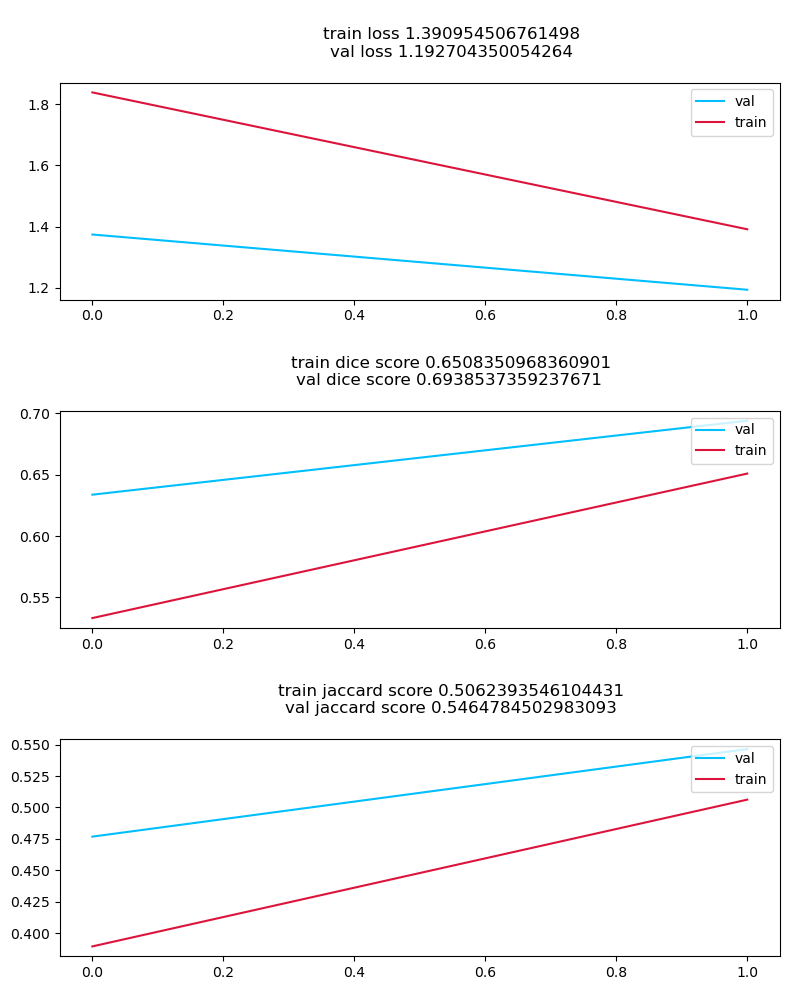


####################
Saved new checkpoint
####################




In [7]:
trainer.run()

In [28]:
torch.cuda.empty_cache()
#torch.empty_cache()